In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [442]:
companies = pd.read_csv("C:/Users/swath/Downloads/companies.csv", encoding ='palmos' )


In [443]:
rounds = pd.read_csv("C:/Users/swath/Downloads/rounds2.csv",encoding ='palmos')


# Check for null values

In [444]:
print('total null values in the companies[permalink] column is ', companies['permalink'].isnull().sum())

total null values in the companies[permalink] column is  0


In [445]:
print('total null values in the rounds[company_permalink] column is ', rounds['company_permalink'].isnull().sum())

total null values in the rounds[company_permalink] column is  0


# Check for unique values in both the data sets

In [438]:
companies['permalink']= companies['permalink'].str.lower()
companies['permalink'].nunique()

66368

In [446]:
rounds['company_permalink']= rounds['company_permalink'].str.lower()
rounds['company_permalink'].nunique()


66368

In [447]:
rounds['company_permalink'].str.lower()

0                                       /organization/-fame
1                                    /organization/-qounter
2                                    /organization/-qounter
3                       /organization/-the-one-of-them-inc-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /organization/zzzzapp-com
114946                                 /organization/ãeron
114947                               /organization/ã”asys-2
114948    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: company_permalink, Length: 114949, dtype: object

In [440]:
rounds = rounds.rename(columns = {'company_permalink':'permalink'})
merged = pd.merge(companies,rounds, how= 'inner',on='permalink')
merged.head()



,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# checking for total null values in all the colums

In [ ]:
merged.isnull().sum()

# let us remove all the unwanted rows

In [ ]:
merged.status.value_counts()

we can remove all the rows that are in closed status

In [ ]:
merged = merged[merged['status'] != 'closed']
merged

types of funding that is recived by the company

In [ ]:
a = pd.DataFrame(merged['funding_round_type'].value_counts()).reset_index()
a.sort_values(by = ['funding_round_type'],ascending = False)

#merged['funding_round_type'].value_counts().describe()


In [ ]:
piechart = plt.pie(a['funding_round_type'][:6],labels = a['index'][:6])


top 5 fundings that have been raised in the venture category

In [ ]:
merged[merged['funding_round_type'] == 'venture']['raised_amount_usd'].value_counts().head()

In [ ]:
 merged[merged['funding_round_type']=='venture']['raised_amount_usd'].describe()

filtering the columns based on sparks investment capacity

In [ ]:
merged[(merged['funding_round_type']=='venture')&(merged['raised_amount_usd']>= 5000000)&(merged['raised_amount_usd']<=15000000)]

no.of investors that have offered funding btween 5 and 15 M in the category of venture type funding

In [ ]:
merged[(merged['funding_round_type']=='venture')& (merged['raised_amount_usd']>=5000000) & (merged['raised_amount_usd']<=15000000)]['raised_amount_usd'].value_counts().sum()

total amount that was raied by all the companies in the category of venture  funding

In [ ]:
merged[merged['funding_round_type']=='venture']['raised_amount_usd'].sum()

# total amount that was raised by companies between 5 million and 1.5 million in the category of venture funding

In [ ]:
merged[(merged['funding_round_type']=='venture')& (merged['raised_amount_usd']>=5000000) & (merged['raised_amount_usd']<=15000000)]['raised_amount_usd'].sum()

# Analysing the seed funding category

top 5 investments in seed funding category

In [ ]:
merged[merged['funding_round_type']=='seed']['raised_amount_usd'].value_counts().head()

In [ ]:
merged[merged['funding_round_type']=='seed']['raised_amount_usd'].describe()

no.of investors that have offered funding btween 5 and 15 M in the category of venture type funding

In [ ]:
merged[(merged['funding_round_type']== 'seed')& (merged['raised_amount_usd']>= 5000000)& (merged['raised_amount_usd']<=15000000)]['raised_amount_usd'].value_counts().sum()

Total amount that was raised by the companies in the category of seed funding 

In [ ]:
merged[merged['funding_round_type']== 'seed']['raised_amount_usd'].sum()

# Total amount that was raised by the companies between 5 million and 1.5 million in the category of seed funding 

In [ ]:
merged[(merged['funding_round_type']== 'seed')& (merged['raised_amount_usd']>= 5000000)& (merged['raised_amount_usd']<=15000000)]['raised_amount_usd'].sum()

# analysing debt financing category

top 5 investmenst in debt financing category

In [ ]:
merged[merged['funding_round_type'] == 'debt_financing']['raised_amount_usd'].value_counts().head()

In [ ]:
merged[merged['funding_round_type'] == 'debt_financing']['raised_amount_usd'].describe()

no.of investors that have offered funding btween 5 and 15 M in the category of debt finance funding

In [ ]:
merged[(merged['funding_round_type']=='debt_financing') & (merged['raised_amount_usd']>= 5000000) & (merged['raised_amount_usd']<= 15000000)]['raised_amount_usd'].value_counts().sum()

Total amount that was raised by the companies in the category of debt financing

In [ ]:
merged[merged['funding_round_type']== 'debt_financing']['raised_amount_usd'].sum()

# Total amount that was raised by the companies between 5 million and 1.5 million in the category of debt financing 

In [ ]:
merged[(merged['funding_round_type']=='debt_financing') & (merged['raised_amount_usd']>= 5000000) & (merged['raised_amount_usd']<= 15000000)]['raised_amount_usd'].sum()

In [ ]:
merged[merged['funding_round_type'] == 'private_equity']['raised_amount_usd'].value_counts().head()

In [ ]:
merged[merged['funding_round_type'] == 'private_equity']['raised_amount_usd'].describe()

In [ ]:
merged[(merged['funding_round_type']=='private_equity') & (merged['raised_amount_usd']>= 5000000) & (merged['raised_amount_usd']<= 15000000)]['raised_amount_usd'].value_counts().sum()

In [ ]:
merged[(merged['funding_round_type']=='private_equity') & (merged['raised_amount_usd']>= 5000000) & (merged['raised_amount_usd']<= 15000000)]['raised_amount_usd'].sum()

In [ ]:
merged[(merged['raised_amount_usd'] >= 5000000) & (merged['raised_amount_usd'] <= 15000000)].groupby(['funding_round_type'])['raised_amount_usd'].size().reset_index().plot.bar()
plt.ylim(0,3000)

most of the funding between 5 million to 1.5 million is made in venture funding category, therefore we can ignore the rest of the categories

In [ ]:
merged = merged[merged['funding_round_type']=='venture']
merged.head()

list of top 10 countries where the investment is being made

In [ ]:
list_of_10 = merged.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending = False).reset_index().head(10)
list_of_10=list_of_10['country_code'].tolist()
list_of_10

retaining the columns which has just top 10 countries and ignoring the rest

In [ ]:
top_10 = merged[merged['country_code'].isin(list_of_10)]
top_10

let us consider top 3 countries with english as their official lang

In [ ]:
top_3 = ['USA','GBR','IND']

In [ ]:
merged = merged[merged['country_code'].isin(top_3)]
merged.head()

we can consider only the value before the pipeline in the categogry list column

In [ ]:
merged['primary_sector'] =(merged['category_list'].str.split('|')).str[0]
merged.head()


imoprt mapping file

In [ ]:
mapping = pd.read_csv("C:/Users/swath/Downloads/mapping (1).csv")
mapping.head()

In [ ]:
mapping = mapping[pd.notnull(mapping['category_list'])]

In [ ]:
main_sector = pd.get_dummies(mapping).idxmax(1)
#mapping = pd.DataFrame({'primary_sector':mapping['primary_sector'],'main_sector':main_sector})
#mapping


In [ ]:
a = mapping['category_list']
mapping = pd.DataFrame({'primary_sector':a,'main_sector':main_sector})
mapping.head()

In [ ]:
merged = merged.rename({'category_list':'primary_sector'})

In [415]:
merged_2 = pd.merge(merged,mapping,how = 'inner', on='primary_sector')

In [416]:
merged_2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment


split the data based on top 3 countries

In [417]:
df1 = merged_2[(merged_2['country_code'] == 'USA')&(merged_2['raised_amount_usd']>=5000000)&(merged_2['raised_amount_usd']<=15000000)]

In [418]:
df1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
14,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Media,Entertainment
18,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,Media,Entertainment
19,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,Media,Entertainment
24,/organization/mediabong,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.0,Media,Entertainment


In [419]:
df2 =merged_2[(merged_2['country_code'] == 'IND')&(merged_2['raised_amount_usd']>=5000000)&(merged_2['raised_amount_usd']<=15000000)]

In [420]:
df2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
222,/organization/ameyo,Ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01-01-2003,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5000000.0,Software,Others
250,/organization/applabs,AppLabs,http://www.applabs.com,Software,acquired,IND,2,Hyderabad,Hyderabad,01-01-2001,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,NaN,29-06-2006,10000000.0,Software,Others
262,/organization/appsdaily-solutions,Appsdaily Solutions,http://appsdailyworld.com/daily/index.jsp,Software,operating,IND,16,Mumbai,Mumbai,01-01-2008,/funding-round/4979e1bb00ddc452753682273fd4466c,venture,B,10-04-2014,5000000.0,Software,Others
558,/organization/canvera-digital-technologies,Canvera Digital Technologies,http://canvera.com,Software,operating,IND,19,Bangalore,Bangalore,01-01-2007,/funding-round/26650720abe4be67bb6550fd4ee6d063,venture,NaN,29-08-2012,6500000.0,Software,Others


In [421]:
df3 =merged_2[(merged_2['country_code'] == 'GBR')&(merged_2['raised_amount_usd']>=5000000)&(merged_2['raised_amount_usd']<=15000000)]

In [422]:
df3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
49,/organization/common-interest-communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,Application Platforms,"News, Search and Messaging"
55,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.0,Application Platforms,"News, Search and Messaging"
56,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.0,Application Platforms,"News, Search and Messaging"


top 5 sectors from the main_sector category that are invested the most in top 3 countires

In [423]:
a = df1.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending = False).head(4)

a


main_sector
Others                                     2732
Cleantech / Semiconductors                 2145
Social, Finance, Analytics, Advertising    1813
News, Search and Messaging                 1445
Name: raised_amount_usd, dtype: int64

In [424]:
b= df2.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending = False).head(4)

In [425]:
c = df3.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending = False).head(4)

In [426]:
df3.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending = False).head(4)

main_sector
Others                                     137
Cleantech / Semiconductors                 114
Social, Finance, Analytics, Advertising     95
News, Search and Messaging                  66
Name: raised_amount_usd, dtype: int64

In [427]:
print(df1[df1['main_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))



print(df1[df1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64
name
Intacct    61800000.0
Name: raised_amount_usd, dtype: float64


In [428]:
print(df2[df2['main_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))


print(df2[df2['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values().head(1))

name
FirstCry.com    39000000.0
Name: raised_amount_usd, dtype: float64
name
Akosha    5000000.0
Name: raised_amount_usd, dtype: float64


In [429]:
print(df1[df1['main_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending  =False).head(1))
      


print(df3[df3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values().head(1))

name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64
name
MOO.COM    5000000.0
Name: raised_amount_usd, dtype: float64


In [430]:

print(df3[df3['main_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

print(df3[df3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))


name
Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64
name
Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64


In [431]:
df_main_sector = pd.DataFrame({'Trend in USA':a,'Trend in IND':b,'Trend in GBR':c})
df_main_sector

,Trend in USA,Trend in IND,Trend in GBR
main_sector,,,
Cleantech / Semiconductors,2145.0,NaN,114.0
Entertainment,NaN,32.0,NaN
"News, Search and Messaging",1445.0,49.0,66.0
Others,2732.0,102.0,137.0
"Social, Finance, Analytics, Advertising",1813.0,32.0,95.0


In [432]:
USA = df1.groupby(['main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False).head(4)
USA = USA.reset_index()
USA['country_code'] = 'USA'
USA

,main_sector,raised_amount_usd,country_code
0,Others,2.441447e+10,USA
1,Cleantech / Semiconductors,1.972990e+10,USA
2,"Social, Finance, Analytics, Advertising",1.590572e+10,USA
3,"News, Search and Messaging",1.281416e+10,USA


In [433]:
GBR = df2.groupby(['main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False).head(4)
GBR = GBR.reset_index()
GBR['country_code'] = 'GBR'
GBR

,main_sector,raised_amount_usd,country_code
0,Others,934289507.0,GBR
1,"News, Search and Messaging",408834545.0,GBR
2,"Social, Finance, Analytics, Advertising",290543500.0,GBR
3,Entertainment,272080000.0,GBR


In [434]:
IND = df2.groupby(['main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False).head(4)
IND = GBR.reset_index()
IND['country_code'] = 'IND'
IND

,index,main_sector,raised_amount_usd,country_code
0,0,Others,934289507.0,IND
1,1,"News, Search and Messaging",408834545.0,IND
2,2,"Social, Finance, Analytics, Advertising",290543500.0,IND
3,3,Entertainment,272080000.0,IND


In [435]:
over_all_comparision = pd.concat([USA,GBR,IND])
over_all_comparision

,main_sector,raised_amount_usd,country_code,index
0,Others,2.441447e+10,USA,NaN
1,Cleantech / Semiconductors,1.972990e+10,USA,NaN
2,"Social, Finance, Analytics, Advertising",1.590572e+10,USA,NaN
3,"News, Search and Messaging",1.281416e+10,USA,NaN
0,Others,9.342895e+08,GBR,NaN
1,"News, Search and Messaging",4.088345e+08,GBR,NaN
2,"Social, Finance, Analytics, Advertising",2.905435e+08,GBR,NaN
3,Entertainment,2.720800e+08,GBR,NaN
0,Others,9.342895e+08,IND,0.0
1,"News, Search and Messaging",4.088345e+08,IND,1.0


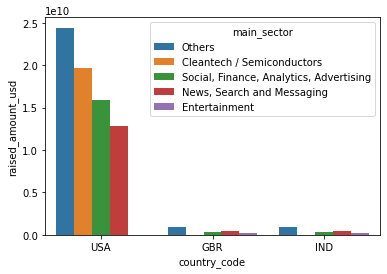

In [436]:
sns.barplot(x='country_code',y='raised_amount_usd',hue='main_sector',data=over_all_comparision)
plt.show()


OBSERVATIONS
1.Most of the investments in the range 5 million to 15 million happend in the category of venture funding
2.top 3 english speaking countries based on their total investments are USA, Great Britan and India
3.Most of the investment that is happening in these top 3 countries are happening in the sector 'others' i.e nothing is specified about those sectors.

Based on the above analysis spark funds can understand to focus on which type of funding, sector and the countyr to get the best ROI.